In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_excel('/content/drive/My Drive/Patient Non-Adherence/2_DataSet/Input.xlsx')
df.head()

,PATIENT ID,AGE,MARITAL STATUS,FINANCIAL STATUS,MEDICLAIM,NUMBER OF MEDICATIONS,ALCOHOL ADICTION,SMOKING,BLOOD PRESSURE,MOOD,ENERGY LEVELS,HEADACHE,CONCENTRATION,DRUG COST,FOLLOWUP CHECKUPS,PRESCRIBTION START DATE,PRESCRIBTION END DATE,REFILL FREQUENCY(MEDICINE1),REFILL FREQUENCY(MEDICINE2),PRESCRIBED MEDICATION PERIOD(MONTHS),REFILLS DONE(MEDICINE 1),REFILLS DONE(MEDICINE 2),SEVIERITY OF ILLNESS(CHECKUP 1),SEVIERITY OF ILLNESS(CHECKUP 2),SEVIERITY OF ILLNESS(CHECKUP 3),SEVIERITY OF ILLNESS(CHECKUP 4),SEVIERITY OF ILLNESS(CHECKUP 5),FREQUENCY,CHRONIC ILLNESS,DIARRHEA,CONSTIPATION,NAUSEA,VOMITING,SORE THROAT,ALLERGIES,COLD,COUGH,FEVER,STOMACH ACHE,DROWSINESS,MEDICINE 1,MEDICINE 2,LABEL
0,PAT001,65,Unmarried,Poor,Yes,1,Yes,Once a week,120,Excited,High,No,High,High,1,2020-01-05,2020-01-10,Fortnightly,Fortnightly,5,6,5,0,0,0,0,0,3,No,Yes,No,No,No,Yes,No,Yes,No,Low,No,Yes,Clopidogrel,Filgrastim,1
1,PAT002,62,Unmarried,Poor,No,2,Ocassionally,Once a week,120,Sad,High,No,High,High,1,2020-01-06,2020-01-07,Monthly,Fortnightly,1,10,8,0,0,0,0,0,3,No,Yes,No,Yes,No,Yes,No,Yes,No,High,No,Yes,Atorvastatin,Diazepam,1
2,PAT003,62,Married,Poor,Yes,10,Ocassionally,Yes,140,Excited,High,No,High,High,1,2020-01-06,2020-01-11,Fortnightly,Monthly,5,8,10,0,0,0,0,0,3,Yes,Yes,Yes,Yes,No,No,No,Yes,No,High,No,Yes,Clindamycin,EMLA cream,1
3,PAT004,58,Unmarried,Poor,No,6,Yes,Once a week,100,Sad,Low,No,High,Low,1,2020-01-03,2020-01-07,Weekly,Monthly,4,5,5,0,0,0,0,0,3,No,Yes,No,Yes,Yes,No,No,Yes,No,High,No,Yes,Cefixime,Dacarbazine,1
4,PAT005,72,Married,Poor,No,2,No,No,110,Excited,High,No,High,Low,1,2020-01-06,2020-01-10,Monthly,Monthly,4,7,5,0,0,0,0,0,2,No,Yes,No,No,Yes,Yes,No,Yes,No,High,No,Yes,Cetrizine,Ifosfamide,1


DATA PREPROCESSING

In [ ]:
#Check for na or missing data
df.isna().sum()

PATIENT ID                              0
AGE                                     0
MARITAL STATUS                          0
FINANCIAL STATUS                        0
MEDICLAIM                               0
NUMBER OF MEDICATIONS                   0
ALCOHOL ADICTION                        0
SMOKING                                 0
BLOOD PRESSURE                          0
MOOD                                    0
ENERGY LEVELS                           0
HEADACHE                                0
CONCENTRATION                           0
DRUG COST                               0
FOLLOWUP CHECKUPS                       0
PRESCRIBTION START DATE                 0
PRESCRIBTION END DATE                   0
REFILL FREQUENCY(MEDICINE1)             0
REFILL FREQUENCY(MEDICINE2)             0
PRESCRIBED MEDICATION PERIOD(MONTHS)    0
REFILLS DONE(MEDICINE 1)                0
REFILLS DONE(MEDICINE 2)                0
SEVIERITY OF ILLNESS(CHECKUP 1)         0
SEVIERITY OF ILLNESS(CHECKUP 2)   

In [ ]:
X = df.drop(['AGE', 'MARITAL STATUS', 'ALCOHOL ADICTION', 'SMOKING', 'BLOOD PRESSURE', 'MOOD', 'ENERGY LEVELS', 'HEADACHE', 'CONCENTRATION', 'PRESCRIBTION START DATE', 'PRESCRIBTION END DATE', 'CHRONIC ILLNESS', 'DIARRHEA', 'CONSTIPATION', 'NAUSEA', 'VOMITING', 'SORE THROAT', 'ALLERGIES', 'COLD', 'COUGH', 'FEVER', 'STOMACH ACHE', 'DROWSINESS', 'FREQUENCY', 'FINANCIAL STATUS', 'MEDICLAIM', 'NUMBER OF MEDICATIONS', 'DRUG COST'], axis = 1)
X

,PATIENT ID,FOLLOWUP CHECKUPS,REFILL FREQUENCY(MEDICINE1),REFILL FREQUENCY(MEDICINE2),PRESCRIBED MEDICATION PERIOD(MONTHS),REFILLS DONE(MEDICINE 1),REFILLS DONE(MEDICINE 2),SEVIERITY OF ILLNESS(CHECKUP 1),SEVIERITY OF ILLNESS(CHECKUP 2),SEVIERITY OF ILLNESS(CHECKUP 3),SEVIERITY OF ILLNESS(CHECKUP 4),SEVIERITY OF ILLNESS(CHECKUP 5),MEDICINE 1,MEDICINE 2,LABEL
0,PAT001,1,Fortnightly,Fortnightly,5,6,5,0,0,0,0,0,Clopidogrel,Filgrastim,1
1,PAT002,1,Monthly,Fortnightly,1,10,8,0,0,0,0,0,Atorvastatin,Diazepam,1
2,PAT003,1,Fortnightly,Monthly,5,8,10,0,0,0,0,0,Clindamycin,EMLA cream,1
3,PAT004,1,Weekly,Monthly,4,5,5,0,0,0,0,0,Cefixime,Dacarbazine,1
4,PAT005,1,Monthly,Monthly,4,7,5,0,0,0,0,0,Cetrizine,Ifosfamide,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,PAT996,5,Monthly,Monthly,9,8,4,1,2,1,3,2,Chlorambucil,Enoxaparin,1
996,PAT997,5,Fortnightly,Monthly,9,6,7,1,2,2,2,1,Carboplatin,Dacarbazine,1
997,PAT998,2,Weekly,Monthly,1,4,4,2,0,0,0,0,Chlorambucil,Hydroxychloroquine phosphate,0
998,PAT999,4,Weekly,Monthly,11,4,8,1,0,0,0,0,Cefixime,EMLA cream,1


In [ ]:
#Convert all the non-numeric columns to numerical data types
from sklearn.preprocessing import LabelEncoder
for column in X.columns:
    if X[column].dtype == np.number:
        continue
    X[column] = LabelEncoder().fit_transform(X[column])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  after removing the cwd from sys.path.


In [ ]:
#Scale the cleaned data
x = X.drop('LABEL', axis = 1)
y = X['LABEL']

#Standardizing/Scaling the features
X1 = StandardScaler().fit_transform(x)

# PREDICTING ADHERENT AND NON-ADHERENT PATIENTS USING RANDOM FOREST 

In [ ]:
#Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [ ]:
X_train = x_train.drop(['PATIENT ID', 'MEDICINE 1', 'MEDICINE 2'], axis=1)
X_test = x_test.drop(['PATIENT ID', 'MEDICINE 1', 'MEDICINE 2'], axis=1)

In [ ]:
#Create the model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
#from sklearn.tree import DecisionTreeClassifier
#model = DecisionTreeClassifier()
#from sklearn.linear_model import LogisticRegression
#model = LogisticRegression()
#Train the model
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
predictions = model.predict(X_test)

#printing the predictions
print(predictions)

[1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 1 0 1 1 0 1
 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 0 1 1
 0 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0
 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1
 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1]


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score = accuracy_score(y_test, predictions)
print(accuracy_score)

0.845


In [ ]:
df1 = x_test[['PATIENT ID', 'MEDICINE 1', 'MEDICINE 2']]

In [ ]:
df1['Label'] = pd.Series(predictions, index=df1.index)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df1["Label"] = df1["Label"].replace({0: "Adherent", 1: "Non-Adherent"})
df1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,PATIENT ID,MEDICINE 1,MEDICINE 2,Label
507,508,6,3,Non-Adherent
818,819,6,3,Non-Adherent
452,453,9,9,Adherent
368,369,9,1,Non-Adherent
242,243,5,3,Non-Adherent
...,...,...,...,...
430,431,5,8,Non-Adherent
874,875,3,4,Non-Adherent
550,551,5,9,Non-Adherent
608,609,6,4,Non-Adherent


In [ ]:
df1.to_excel('/content/drive/My Drive/Patient Non-Adherence/2_DataSet/Output.xlsx')

FEATURE IMPORTANCE

In [ ]:
from matplotlib import pyplot as plt
model.feature_importances_

array([0.101215  , 0.08298596, 0.04694243, 0.27048417, 0.15499524,
       0.15454115, 0.09654444, 0.02295642, 0.02533154, 0.02227272,
       0.02173095])

<BarContainer object of 11 artists>

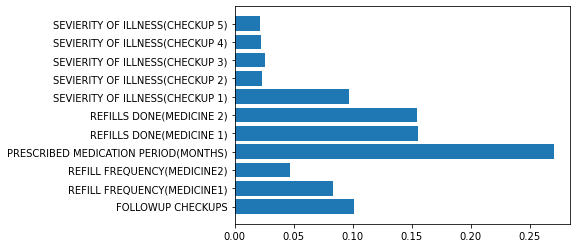

In [ ]:
plt.barh(X_test.columns, model.feature_importances_)

KFOLD CROSS VALIDATION

In [ ]:
from sklearn.model_selection import cross_validate
cv = cross_validate(model, x, y, cv=10)
print(cv['test_score'])
print(cv['test_score'].mean())

[0.72 0.79 0.76 0.76 0.79 0.81 0.77 0.82 0.82 0.8 ]
0.784


PREDICTING ADHERENT AND NON-ADHERENT PATIENTS USING XGBOOST

In [ ]:
import xgboost as xgb
x1 = x
y1 = y

In [ ]:
#define data_dmatrix
data_dmatrix = xgb.DMatrix(data=x1,label=y1)

In [ ]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=1)

In [ ]:
X1_train = x1_train.drop(['PATIENT ID', 'MEDICINE 1', 'MEDICINE 2'], axis=1)
X1_test = x1_test.drop(['PATIENT ID', 'MEDICINE 1', 'MEDICINE 2'], axis=1)

In [ ]:
from xgboost import XGBClassifier

#declare parameters
params = {'objective' : 'binary:logistic', 'max_depth' : 10, 'min_child_weight' : 5, 'subsample' : 0.3, 'learning_rate' : 0.05, 'gamma' : 2, 'reg_lambda' : 0}

#instantiate the classifier
xgb_clf = XGBClassifier(**params)

#fit the classifier to the training data
xgb_clf.fit(X1_train, y1_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=2,
              learning_rate=0.05, max_delta_step=0, max_depth=10,
              min_child_weight=5, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=0, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.3, verbosity=1)

In [ ]:
y_pred = xgb_clf.predict(X1_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score = accuracy_score(y1_test, y_pred)
print(accuracy_score)

0.84


In [ ]:
from xgboost import cv
xgb_cv = cv(dtrain=data_dmatrix, params=params, nfold=10, num_boost_round=50, early_stopping_rounds=10, metrics="auc", as_pandas=True, seed=123)


In [ ]:
xgb_cv.head()

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.773593,0.019033,0.745290,0.051050
1,0.812779,0.008118,0.775513,0.055766
2,0.828908,0.006541,0.791687,0.036791
3,0.839598,0.007416,0.803418,0.038076
4,0.845170,0.008203,0.810933,0.030428


The accuracy for RandomForestClassifier is 78% and The accuracy for XGBoost is 84%

PRECISION-RECALL

In [ ]:
#Check precision, recall, f1-score
from sklearn.metrics import classification_report
print(classification_report(y1_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.53      0.62        49
           1       0.86      0.94      0.90       151

    accuracy                           0.84       200
   macro avg       0.80      0.74      0.76       200
weighted avg       0.83      0.84      0.83       200



POSITIVE AND NEGATIVE CORRELATION

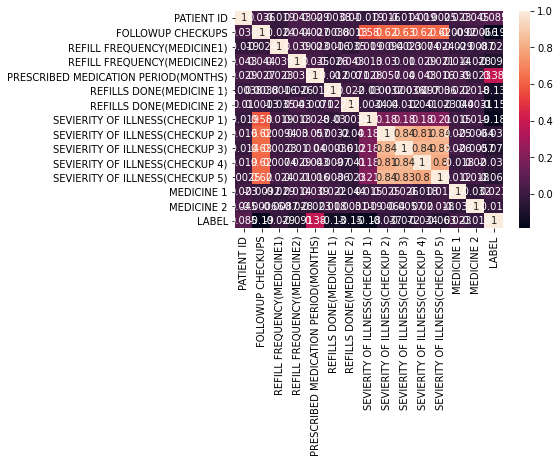

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt
corrMatrix = X.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

If the correlation value is 0.9 or 1, it is called as strongly positive correlation and if the correlation value is -1 it is called as strongly negative correlation.

FORECASTING THE DRUG MANUFACTURING

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [73]:
df1 = pd.read_excel('/content/drive/My Drive/Patient Non-Adherence/Forecasting/Drug Forecasting.xlsx')
df1 = df1.drop(['Unit_Price', 'Quantity_Sold'], axis=1)
df1.head()

,Date,Location,Drug,PATIENT_NON_ADHERENT_COUNT,Sales
0,2018-01-01,San Francisco,Abilify,2807,264277
1,2018-02-01,San Francisco,Abilify,1869,268105
2,2018-03-01,San Francisco,Abilify,1952,276161
3,2018-04-01,San Francisco,Abilify,4802,291132
4,2018-05-01,San Francisco,Abilify,4180,262567


In [74]:
df1['Date'] = pd.to_datetime(df1.Date , format = '%d/%m/%Y')
data = df1.drop(['Date'], axis=1)
data.index = df1.Date
data

,Location,Drug,PATIENT_NON_ADHERENT_COUNT,Sales
Date,,,,
2018-01-01,San Francisco,Abilify,2807,264277
2018-02-01,San Francisco,Abilify,1869,268105
2018-03-01,San Francisco,Abilify,1952,276161
2018-04-01,San Francisco,Abilify,4802,291132
2018-05-01,San Francisco,Abilify,4180,262567
...,...,...,...,...
2020-08-01,Los Angeles,Catalent,2110,202181
2020-09-01,Los Angeles,Catalent,1818,243847
2020-10-01,Los Angeles,Catalent,2748,214295


In [75]:
#Convert all the non-numeric columns to numerical data types
for column in data.columns:
    if data[column].dtype == np.number:
        continue
    data[column] = LabelEncoder().fit_transform(data[column])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  This is separate from the ipykernel package so we can avoid doing imports until


In [76]:
#Split the data
nobs = 4
data_train, data_test = data[0:-nobs], data[-nobs:]

In [77]:
# Augmented Dickey-Fuller Test (ADF Test)/unit root test
from statsmodels.tsa.stattools import adfuller
def adf_test(ts, signif=0.05):
    datatest = adfuller(ts, autolag='AIC')
    adf = pd.Series(datatest[0:4], index=['Test Statistic','p-value','# Lags','# Observations'])
    for key,value in datatest[4].items():
       adf['Critical Value (%s)'%key] = value
    print (adf)
    
    p = adf['p-value']
    if p <= signif:
        print(f" Series is Stationary")
    else:
        print(f" Series is Non-Stationary")
#apply adf test on the series
adf_test(data_train["Sales"])
adf_test(data_train["Drug"])
adf_test(data_train["Location"])
adf_test(data_train["PATIENT_NON_ADHERENT_COUNT"])

Test Statistic         -1.298551e+01
p-value                 2.883911e-24
# Lags                  2.000000e+00
# Observations          6.410000e+02
Critical Value (1%)    -3.440593e+00
Critical Value (5%)    -2.866060e+00
Critical Value (10%)   -2.569177e+00
dtype: float64
 Series is Stationary
Test Statistic           -2.024353
p-value                   0.275998
# Lags                    0.000000
# Observations          643.000000
Critical Value (1%)      -3.440561
Critical Value (5%)      -2.866045
Critical Value (10%)     -2.569169
dtype: float64
 Series is Non-Stationary
Test Statistic           -3.495423
p-value                   0.008105
# Lags                    0.000000
# Observations          643.000000
Critical Value (1%)      -3.440561
Critical Value (5%)      -2.866045
Critical Value (10%)     -2.569169
dtype: float64
 Series is Stationary
Test Statistic         -9.591329e+00
p-value                 2.032316e-16
# Lags                  2.000000e+01
# Observations          6

In [78]:
# 1st difference
data_differenced = data_train.diff().dropna()
# stationarity test again with differenced data
adf_test(data_differenced["Drug"])

Test Statistic          -25.308360
p-value                   0.000000
# Lags                    0.000000
# Observations          642.000000
Critical Value (1%)      -3.440577
Critical Value (5%)      -2.866052
Critical Value (10%)     -2.569173
dtype: float64
 Series is Stationary


In [79]:
# model fitting
model = VAR(data_differenced)
results = model.fit(maxlags=12, ic='aic')
results.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 27, Apr, 2021
Time:                     05:29:58
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    11.4479
Nobs:                     634.000    HQIC:                   10.8122
Log likelihood:          -6749.96    FPE:                    33162.1
AIC:                      10.4086    Det(Omega_mle):         26430.7
--------------------------------------------------------------------
Results for equation Location
                                   coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------------------
const                                -0.003387         0.009159           -0.370           0.712
L1.Location                           0.002441         0.041617            0.059          

In [83]:
# forecasting
lag_order = results.k_ar
results.forecast(data.values[-lag_order:], 6)

array([[-5.73133599e-02, -2.09753757e-01, -1.24480454e+02,
        -4.19585922e+02],
       [-5.81260151e-03, -1.14897850e-01,  2.45300391e+00,
         2.06997036e+01],
       [ 6.35852158e-02, -2.02247233e-01,  7.61451175e+00,
         1.08089167e+01],
       [ 1.69498808e-02, -1.16455276e-01,  3.51264232e+01,
         9.99348786e+01],
       [ 1.54958736e-02, -2.76387281e-02, -8.92016804e+00,
         2.03718042e+02],
       [-3.81452412e-02,  4.93107303e-02,  1.54587743e+01,
         1.47590633e+01]])

PLOTTING

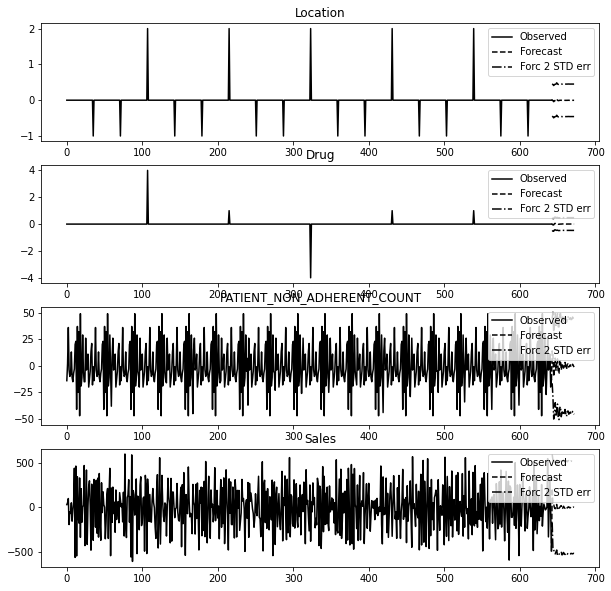

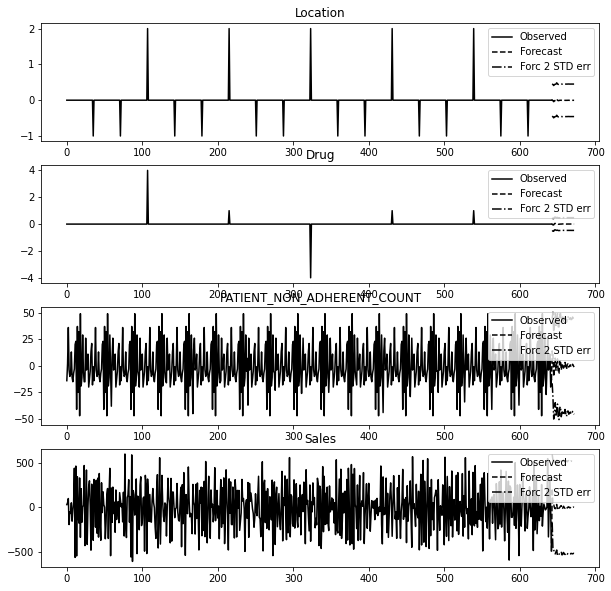

In [90]:
# plotting
results.plot_forecast(30)

In [88]:
# Evaluation
fevd = results.fevd(6)
fevd.summary()

FEVD for Location
     Location      Drug  PATIENT_NON_ADHERENT_COUNT     Sales
0    1.000000  0.000000                    0.000000  0.000000
1    0.999298  0.000170                    0.000032  0.000499
2    0.997647  0.000174                    0.000212  0.001967
3    0.994116  0.000176                    0.000453  0.005255
4    0.993338  0.000176                    0.000679  0.005806
5    0.989590  0.000218                    0.001075  0.009117

FEVD for Drug
     Location      Drug  PATIENT_NON_ADHERENT_COUNT     Sales
0    0.033084  0.966916                    0.000000  0.000000
1    0.032995  0.963818                    0.000177  0.003010
2    0.032894  0.960835                    0.000722  0.005549
3    0.032887  0.960633                    0.000826  0.005654
4    0.032515  0.949757                    0.001254  0.016474
5    0.032480  0.948385                    0.001979  0.017156

FEVD for PATIENT_NON_ADHERENT_COUNT
     Location      Drug  PATIENT_NON_ADHERENT_COUNT     Sales


In [86]:
# forecasting
pred = results.forecast(results.y, steps=nobs)
data_forecast = pd.DataFrame(pred, index=data.index[-nobs:], columns=data.columns + '_1d')
data_forecast.tail()
# inverting transformation
def invert_transformation(data_train, data_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    data_fc = data_forecast.copy()
    columns = data_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            data_fc[str(col)+'_1d'] = (data_train[col].iloc[-1]-data_train[col].iloc[-2]) + data_fc[str(col)+'_1d'].cumsum()
        # Roll back 1st Diff
        data_fc[str(col)+'_forecast'] = data_train[col].iloc[-1] + data_fc[str(col)+'_1d'].cumsum()
    return data_fc
# show inverted results in a dataframe
data_results = invert_transformation(data_train, data_forecast, second_diff=True)        
data_results.loc[:, ['Sales_forecast']]

/usr/local/lib/python3.7/dist-packages/statsmodels/base/wrapper.py:35: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


,Sales_forecast
Date,
2020-09-01,-265.029698
2020-10-01,-513.774754
2020-11-01,-734.671562
2020-12-01,-957.571853


In [103]:
from pandas.tseries.offsets import DateOffset
future_date=[data.index[-1]+ DateOffset(months=x)for x in range(0,6)]

In [109]:
future_datest_df=pd.DataFrame(index=future_date[1:])

In [110]:
future_datest_df.tail()

""
2021-01-01
2021-02-01
2021-03-01
2021-04-01
2021-05-01


In [112]:
future_df=pd.concat([data,future_datest_df])
future_df

,Location,Drug,PATIENT_NON_ADHERENT_COUNT,Sales
2018-01-01,2.0,0.0,24.0,415.0
2018-02-01,2.0,0.0,10.0,446.0
2018-03-01,2.0,0.0,12.0,499.0
2018-04-01,2.0,0.0,48.0,598.0
2018-05-01,2.0,0.0,44.0,406.0
...,...,...,...,...
2021-01-01,NaN,NaN,NaN,NaN
2021-02-01,NaN,NaN,NaN,NaN
2021-03-01,NaN,NaN,NaN,NaN
2021-04-01,NaN,NaN,NaN,NaN
